In [2]:
import pandas as pd
import scipy.stats as sta
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('University_Clustering.csv')

In [8]:
df.sample(2)

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
8,Harvard,MA,1400,91,14,11,39525,97
20,UMichigan,MI,1180,65,68,16,15470,85


# labling the data using clasting mechanism

In [10]:
df.isnull().sum()

Univ        0
State       0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

In [11]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [12]:
df_new=df.drop(['State'],axis=1)

In [13]:
df_new.sample(2)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
8,Harvard,1400,91,14,11,39525,97
16,Stanford,1360,90,20,12,36450,93


In [14]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [15]:
df_norm=norm_func(df_new.iloc[:,1:])

In [16]:
df_norm.sample(2)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667
15,0.000000,0.000000,1.000000,0.684211,0.006597,0.066667


In [20]:
import scipy.stats as sta
from scipy.cluster.hierarchy import linkage

In [21]:
import scipy.cluster.hierarchy as sch 

In [22]:
z=linkage(df_norm,method="complete",metric="euclidean")

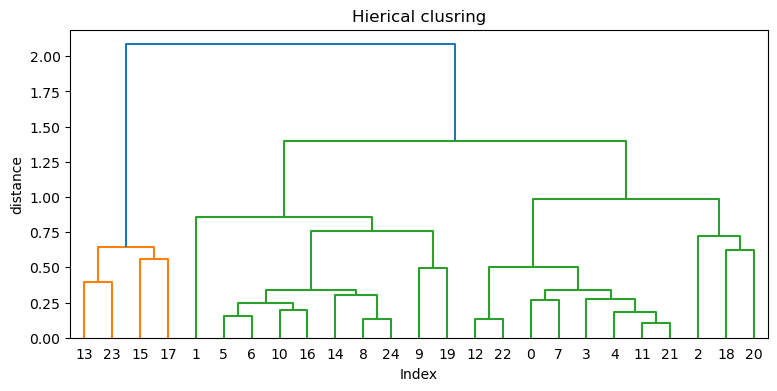

In [34]:
plt.figure(figsize=(9,4));
# optional part
plt.title("Hierical clusring")
plt.xlabel("Index");
plt.ylabel("distance")
#requried part:
sch.dendrogram(z,leaf_rotation=0,leaf_font_size=10)
plt.show()

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [37]:
h_com=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity="euclidean").fit(df_norm)

C:\Users\raj\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [40]:
h_com.labels_

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0,
       0, 1, 2], dtype=int64)

In [41]:
set(h_com.labels_)

{0, 1, 2}

In [42]:
cluster_labels=pd.Series(h_com.labels_)

In [43]:
df_new['clust']=cluster_labels

In [45]:
df_new.sample(3)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
8,Harvard,1400,91,14,11,39525,97,2
23,UWisconsin,1085,40,69,15,11857,71,1
24,Yale,1375,95,19,11,43514,96,2


In [65]:
df_new = df_new.iloc[:, [7, 1, 2, 3, 4, 5]]

In [67]:
df_new.shape

(25, 7)

In [55]:
df_new.sample

,clust,SAT,Top10,Accept,SFRatio,Expenses,GradRate
10,2,1380,94,30,10,34870,91
17,1,1075,49,67,25,8704,67
14,2,1375,91,14,8,30220,95


In [51]:
df_new.iloc[:,0:].groupby(df_new.clust).mean()

,clust,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,,
0,0.0,1260.0,78.818182,39.181818,12.818182,21446.909091,87.636364
1,1.0,1061.5,38.750000,70.000000,19.250000,9953.000000,71.750000
2,2.0,1355.5,89.000000,26.900000,10.000000,40897.200000,91.700000


In [50]:
# get the data for csv file
df_new.to_csv("NewUniversity.csv",encoding="utf-8")

In [68]:
df_new['Univ']=df['Univ']

C:\Users\raj\AppData\Local\Temp\ipykernel_39508\2536513362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Univ']=df['Univ']


In [69]:
df_new.sample(2)

,GradRate,clust,SAT,Top10,Accept,SFRatio,Expenses,Univ
1,81,2,1415,100,25,6,63575,CalTech
2,72,0,1260,62,59,9,25026,CMU


In [70]:
df.head(2)

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81


In [71]:
df_new.head(2)

,GradRate,clust,SAT,Top10,Accept,SFRatio,Expenses,Univ
0,94,0,1310,89,22,13,22704,Brown
1,81,2,1415,100,25,6,63575,CalTech
